<h1><center> Assignment 2 (Part B) </center> </h1>

<h2 style="text-align:left;">
    Name: Sushovan Jena
    <span style="float:right;">
        Course: CS669
    </span>
</h2>
<h2 style="text-align:left;">
    Enroll No.: S20011
    <span style="float:right;">
         (Pattern Recognition)
    </span>
</h2>

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [35]:
!unzip /content/nls_data.zip -d /content/nls_data

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
# path = 'nls_data/'
# os.chdir(path)
# files = []
# for file in os.listdir(path):
#     if file.endswith(".txt"):
#         files.append(os.path.join(path, file))
# print(path)
# print(files)

path = "D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/"
# os.chdir(path)
files = []
for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(os.path.join(path, file))
print(path)
print(files)

D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/
['D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/class1.txt', 'D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/class2.txt']


In [37]:
## Split  the training and tesing data ##
def get_data(dataset):
    train = dataset.sample(frac=0.80, random_state=100)
    test = dataset[~dataset.index.isin(train.index)]
    return train, test

In [38]:
trainl_data = pd.DataFrame(columns=['X', 'Y', 'label'])
testl_data = pd.DataFrame(columns=['X', 'Y', 'label'])
alldata_l = pd.DataFrame(columns=['X', 'Y', 'label'])

In [39]:
for file, i in zip(files, range(len(files))):
    data = pd.read_csv(file, header=None)
    data.rename(columns = {0:'X', 1:'Y'}, inplace = True)
    print(i)
    data['label'] = [i for _ in range(data.shape[0])]
    data=data.sample(frac=1).reset_index(drop=True)
    ### Split data in training and test dataset
    temp_train, temp_test = get_data(data)
    trainl_data = trainl_data.append(temp_train)
    testl_data = testl_data.append(temp_test)
    alldata_l = alldata_l.append(data)

0
1


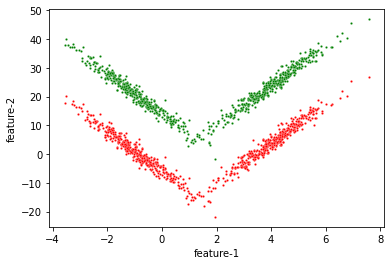

In [40]:
sns.scatterplot(trainl_data.loc[trainl_data.label==0]['X'].to_numpy(),trainl_data.loc[trainl_data.label==0]['Y'],s=5,color='red')
sns.scatterplot(trainl_data.loc[trainl_data.label==1]['X'].to_numpy(),trainl_data.loc[trainl_data.label==1]['Y'],s=5,color='green')
plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

In [41]:
train_data= trainl_data.loc[:,['X','Y']].values
test_data= testl_data.loc[:,['X','Y']].values
alldata= alldata_l.loc[:,['X','Y']].values

## K-Means

### WCSS

In [42]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

In [43]:
len(train_data)

1600

In [44]:
def kmeans(X, k):
  
  # X.set_index("0",inplace=True)
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  


Find K value using elbow method

In [45]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(train_data, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(train_data, centroids, cluster)
    cost_list.append(cost)

Plot a line plot between WCSS and k

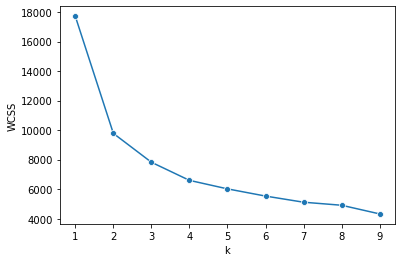

In [46]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [47]:
k = 3
centroids, cluster = kmeans(train_data, k)

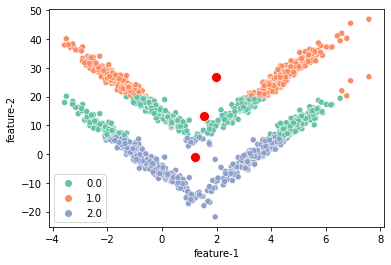

In [48]:
sns.scatterplot(train_data[:,0], train_data[:, 1], hue=cluster, palette="Set2")
# color_labels = centroids.unique()
# rgb_values = sns.color_palette("Set2", 4)
# color_map = dict(zip(color_labels, rgb_values))
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')


plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

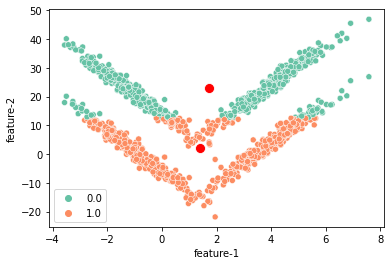

In [49]:
k = 2
centroids, cluster = kmeans(train_data, k)
sns.scatterplot(train_data[:,0], train_data[:, 1], hue=cluster, palette="Set2")
# color_labels = centroids.unique()
# rgb_values = sns.color_palette("Set2", 4)
# color_map = dict(zip(color_labels, rgb_values))
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')


plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

In [61]:
print(centroids)

[[ 1.73325145 23.12114286]
 [ 1.37870736  1.98700274]]


In [62]:
trainl_data['cluster']=cluster

In [65]:
grp = trainl_data.groupby(by=cluster)

In [68]:
trainl_data.reset_index(inplace=True)
trainl_data.drop(['index'],axis=1,inplace=True)
trainl_data['label']= trainl_data['label'].astype('int')
trainl_data['cluster']= trainl_data['cluster'].astype('int')

In [69]:
def classification(X,cluster):
  c = np.zeros(k)
  X = pd.DataFrame(X, columns = ['X','Y','label'])
  X.reset_index(inplace=True)
  X.drop(['index'],axis=1,inplace=True)
  grp = X.groupby(by=cluster)
  for i in range(k):
    grp_i = grp.get_group(i)
    cnt_0 = grp_i.loc[grp_i.label== 0]['label'].count()
    cnt_1 = grp_i.loc[grp_i.label== 1]['label'].count()
    # grp_1 = grp.get_group(1)
    # l_1 = grp_1.loc[grp_1.label== 1]['label'].count()
    if cnt_0 > cnt_1 :
      c[i]= 0
    else:
      c[i]= 1
  return c

In [70]:
#Test Data
def predict(Y):
  cluster_test = np.zeros(Y.shape[0])
  class_test = np.zeros(Y.shape[0])
  y_pred = []
  for i, row in enumerate(Y):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster_test[i] = idx
  C = classification(Y,cluster_test)
  # print(cluster_test)
  C = C.astype(int)
  cluster_test = cluster_test.astype(int)
  y_pred = [C[i] for i in cluster_test]
  # for i in cluster_test:
  #   print(C[i])

  #   # y_pred.append(int(C[i]))

  
  return y_pred


In [71]:
Y_pred = predict(testl_data.values)
print("Accuracy of test data = {}\n".format(accuracy_score(list(testl_data['label']), Y_pred)))

Accuracy of test data = 0.935

